In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Vrinda\\OneDrive\\Desktop\\projects\\100 days\\spam_cleaned.csv', encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,target,text,characters,sentences,words
0,0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,1,0,Ok lar... Joking wif u oni...,29,2,8
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,3,0,U dun say so early hor... U c already then say...,49,1,13
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


### Data Preprocessing
lower case---tokenization 
---remove special characters 
---remove stop words and puntuations 
---stemming 

In [4]:
import nltk 
nltk.download('stopwords')

import string 
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vrinda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def transform_text(text):
    text = text.lower() #convert all letter in lower case
    text = nltk.word_tokenize(text)  #break the sentence (tokanize)

    y=[]
    for i in text:
        if i.isalnum():  #remove all the special char
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english'):  #remove all the stop words
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in string.punctuation:   #remove all the punctuation
            y.append(i)
    text =y[:]
    y.clear()

    for i in text:
        y.append(nltk.PorterStemmer().stem(i)) #stemming
    return " ".join(y)

In [7]:
 #eg.
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [8]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
df['transformed_text'] = df['text'].apply(transform_text)

In [11]:
df.head()

,Unnamed: 0,target,text,characters,sentences,words,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [12]:
from wordcloud import WordCloud #to see the most used words in the text
spam_wc = WordCloud(width=800, height=400, max_words=100,background_color='white').generate(' '.join(df[df['target']==1]['transformed_text']))

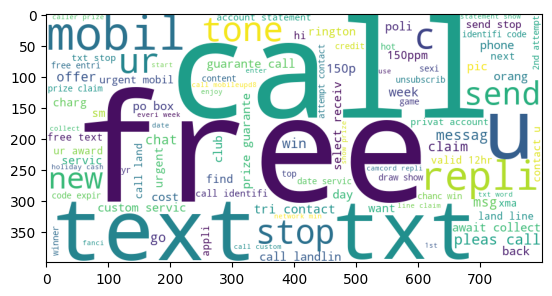

In [13]:
plt.imshow(spam_wc)

In [14]:
spam_wc = WordCloud(width=800, height=400, max_words=100,background_color='white').generate(' '.join(df[df['target']==0]['transformed_text']))

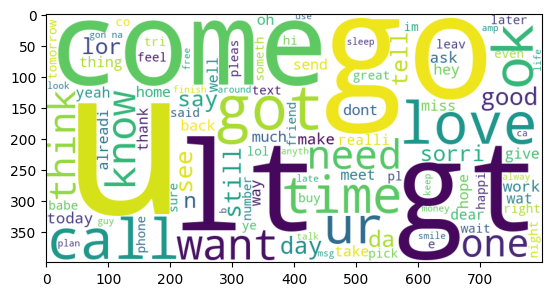

In [15]:
plt.imshow(spam_wc)

In [16]:
df.head()

,Unnamed: 0,target,text,characters,sentences,words,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [17]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [18]:
len(spam_corpus)

9936

In [19]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

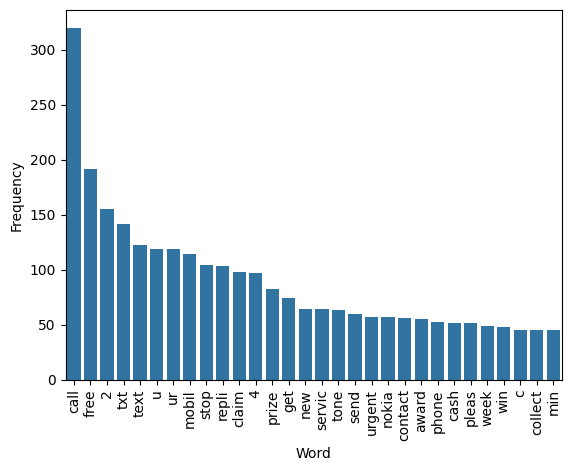

In [20]:
df_most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word',y='Frequency',data=df_most_common_spam)
plt.xticks(rotation=90)
plt.show()


In [21]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [22]:
len(ham_corpus)

35305

In [23]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

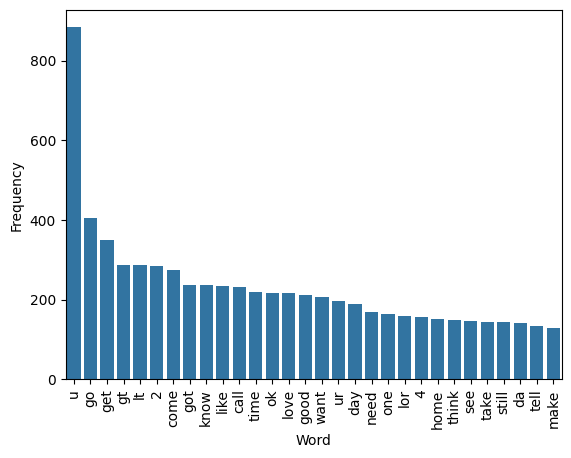

In [24]:
df_most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word',y='Frequency',data=df_most_common_ham)
plt.xticks(rotation=90)
plt.show()

### Model Building

In [25]:
#vetorize the text (bag of words, tfid, word2vec)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [26]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [27]:
X.shape

(5169, 3000)

In [28]:
y = df['target'].values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [31]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8733075435203095
0.5161290322580645
[[791 105]
 [ 26 112]]


In [32]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.971953578336557
1.0
[[896   0]
 [ 29 109]]


In [33]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


with tfidf mnb has the highest precision 

In [34]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))